# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

 Preprocessing

 Training

In [17]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3598 files belonging to 2 classes.


 Validation Image

In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 900 files belonging to 2 classes.


## Building Model

In [19]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Dropout(0.20))

In [25]:
cnn.add(tf.keras.layers.Flatten())

In [26]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [27]:
cnn.add(tf.keras.layers.Dropout(0.3)) 

In [28]:

cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [29]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │    13,825,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         3,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,000,758 (57.22 MB)

 Trainable params: 15,000,758 (57.22 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling and Training Phase

In [30]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=11)

Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7609 - loss: 0.9987 - val_accuracy: 0.9711 - val_loss: 0.0789
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9745 - loss: 0.0736 - val_accuracy: 0.9744 - val_loss: 0.0679
Epoch 3/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9770 - loss: 0.0649 - val_accuracy: 0.9822 - val_loss: 0.0460
Epoch 4/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9882 - loss: 0.0366 - val_accuracy: 0.9911 - val_loss: 0.0441
Epoch 5/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9906 - loss: 0.0318 - val_accuracy: 0.9944 - val_loss: 0.0138
Epoch 6/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9936 - loss: 0.0145 - val_accuracy: 0.9967 - val_loss: 0.0109
Epoch 7/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9908 - loss: 0.0263 - val_accuracy: 0.9944 - val_loss: 0.0123
Epoch 8/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9978 - loss: 0.0063 - val_accu

## Evaluating Model

In [32]:

train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 1.0000 - loss: 6.3905e-05
Training accuracy: 1.0


In [33]:

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.9983 - loss: 0.0037
Validation accuracy: 0.9977777600288391


### Saving Model

In [34]:
cnn.save('trained_plant_disease_model_strobery.keras')

In [35]:

import json
with open('training_hist_strobery.json','w') as f:
  json.dump(training_history.history,f)

In [36]:
training_history.history

{'accuracy': [0.8913285136222839,
  0.9758198857307434,
  0.9816564917564392,
  0.9880489110946655,
  0.9916620254516602,
  0.9936075806617737,
  0.9911061525344849,
  0.996664822101593,
  0.9983323812484741,
  0.9994441270828247,
  1.0],
 'loss': [0.36271369457244873,
  0.0720733106136322,
  0.053080447018146515,
  0.036439307034015656,
  0.025597982108592987,
  0.0168017465621233,
  0.029319752007722855,
  0.00839195866137743,
  0.005727655254304409,
  0.0022498522885143757,
  0.00025070508127100766],
 'val_accuracy': [0.9711111187934875,
  0.9744444489479065,
  0.9822221994400024,
  0.9911110997200012,
  0.9944444298744202,
  0.996666669845581,
  0.9944444298744202,
  0.9933333396911621,
  0.995555579662323,
  0.995555579662323,
  0.9977777600288391],
 'val_loss': [0.0789443850517273,
  0.06785739958286285,
  0.04602240398526192,
  0.04414527118206024,
  0.013767106458544731,
  0.010858113877475262,
  0.012331238016486168,
  0.01708265393972397,
  0.013526533730328083,
  0.007679975

In [37]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


 Accuracy Visualization

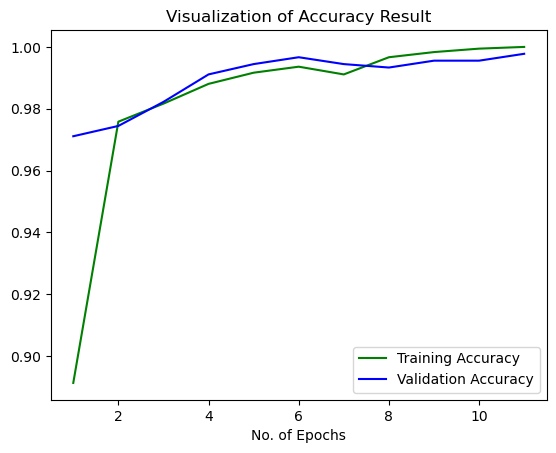

In [38]:
epochs = [i for i in range(1,12)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

other metrics for model evaluation

In [39]:
class_name = validation_set.class_names

In [40]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 900 files belonging to 2 classes.


In [41]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

900/900 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step


In [42]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [43]:
Y_true

<tf.Tensor: shape=(900,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

In [44]:
predicted_categories

<tf.Tensor: shape=(900,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [46]:

print(classification_report(Y_true,predicted_categories,target_names=class_name))

                          precision    recall  f1-score   support

Strawberry___Leaf_scorch       1.00      0.49      0.66       900
    Strawberry___healthy       0.00      0.00      0.00         0

                accuracy                           0.49       900
               macro avg       0.50      0.25      0.33       900
            weighted avg       1.00      0.49      0.66       900



c:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix Visualization

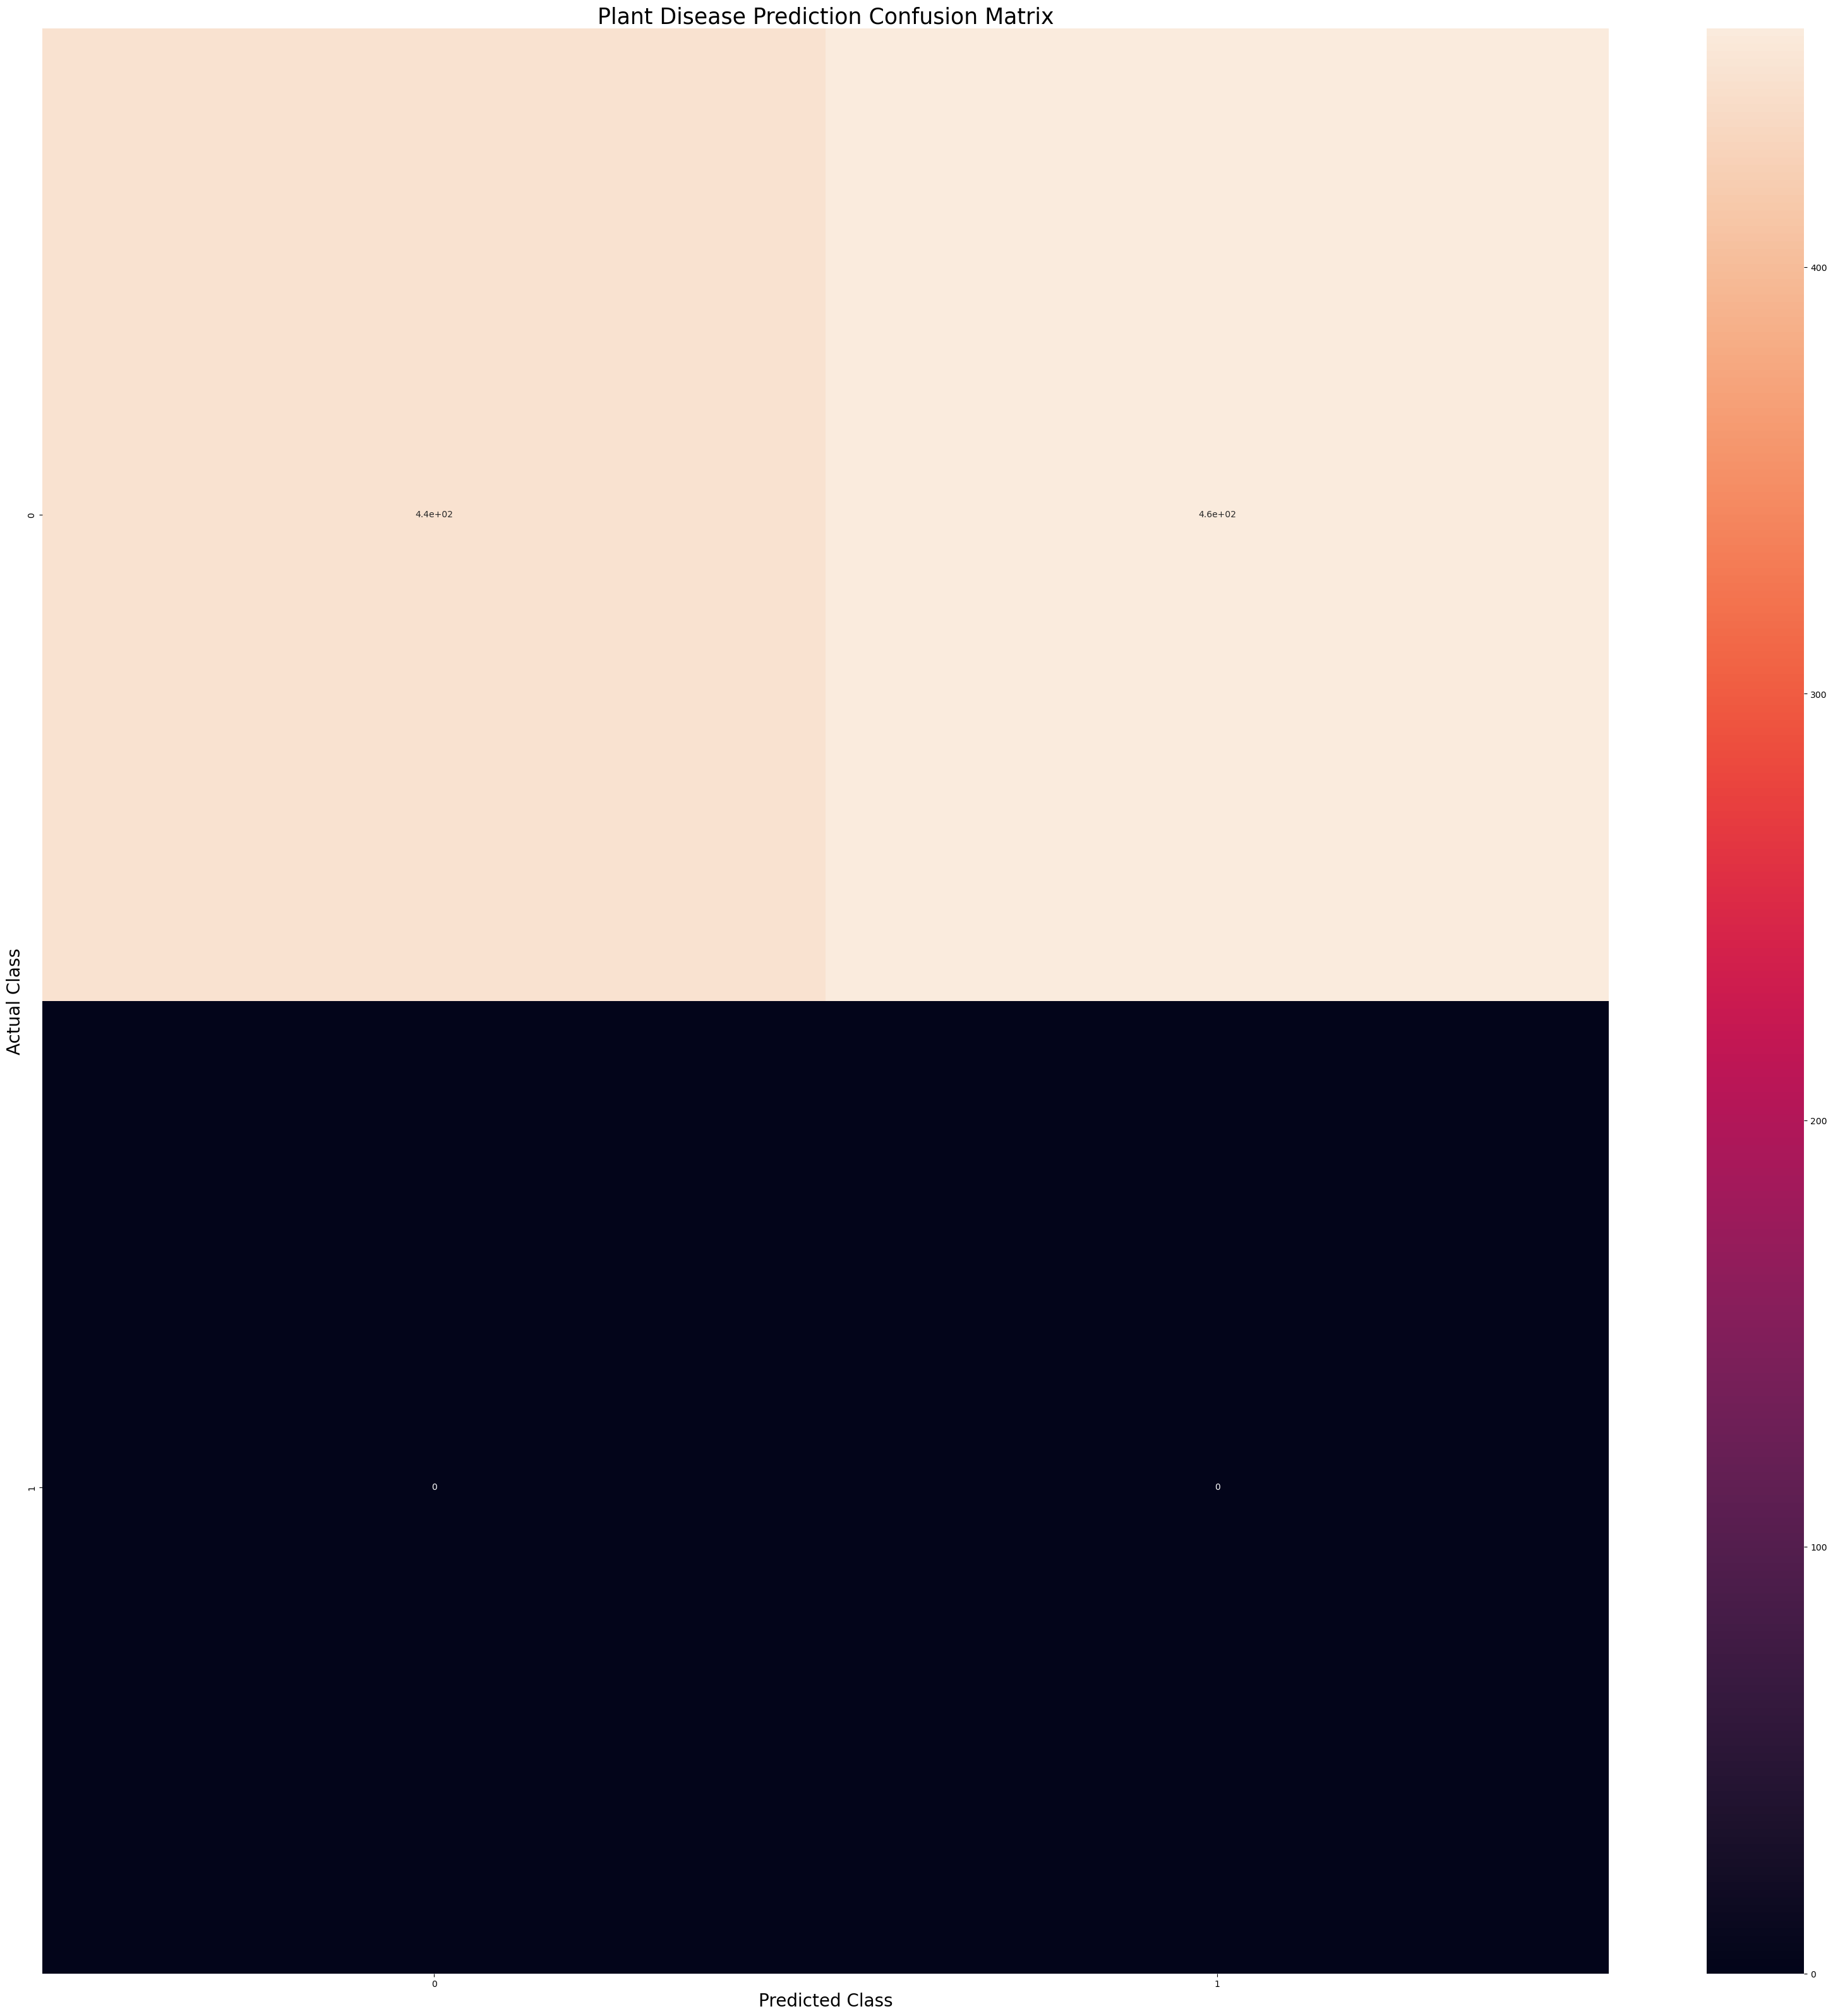

In [47]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()